<ipython-input-26-b34d4cd529aa>:70: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.concatenate([-np.ones(n, dtype=np.int), np.ones(n, dtype=np.int)])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

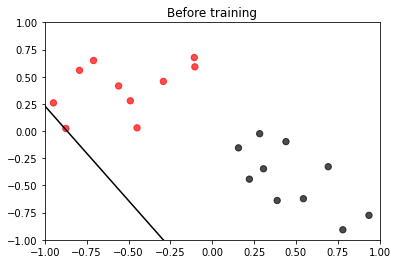

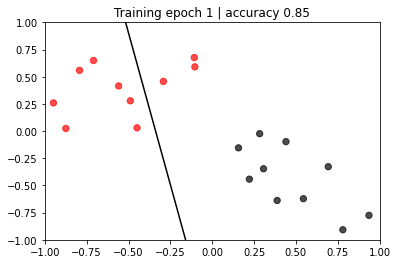

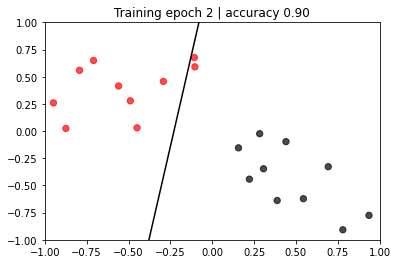

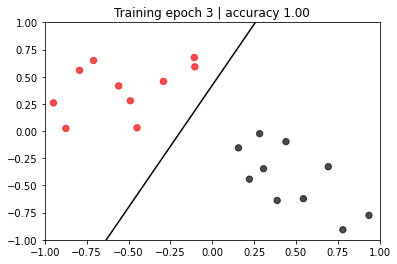

In [26]:
# Assignment 2 - Perceptron
# Machine Learning class: COMP 5630/6630/6630-D01
# Anh Nguyen <anh.ng8@gmail.com>


import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

figdir = "../figures"

def save_fig(fname):
    if figdir:
        plt.savefig(os.path.join(figdir, fname))


np.random.seed(3)


class Perceptron(object):
    def __init__(self, no_of_inputs):
        self.weights = np.random.rand(no_of_inputs + 1)

    def predict_single(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            output = 1
        else:
            output = -1
        return output

    def predict(self, X):
        n = X.shape[0]
        yhat = np.zeros(n)
        for i in range(n):
            yhat[i] = self.predict_single(X[i, :])
        return yhat

    def fit(self, training_inputs, labels):
        for inputs, label in zip(training_inputs, labels):
            prediction = self.predict_single(inputs)

            if prediction != label:
              self.weights[1:] += (label) * inputs
              self.weights[0] += (label)


    def eval(self, training_inputs, labels):
        accuracy = 0

        for inputs, label in zip(training_inputs, labels):
            prediction = self.predict_single(inputs)

            if prediction == label:
                accuracy += 1

        return accuracy / len(labels)        


def generateData(n):
    # Generates a 2D linearly separable dataset with 2n samples.
    # Red and black clusters in top left and bottom right quadrant
    xb = (np.random.rand(n) * 2 - 1) / 2 - 0.5
    yb = (np.random.rand(n) * 2 - 1) / 2 + 0.5
    xr = (np.random.rand(n) * 2 - 1) / 2 + 0.5
    yr = (np.random.rand(n) * 2 - 1) / 2 - 0.5
    XB = np.stack([xb, yb], axis=1)
    XR = np.stack([xr, yr], axis=1)
    X = np.concatenate([XB, XR])
    y = np.concatenate([-np.ones(n, dtype=np.int), np.ones(n, dtype=np.int)])
    return X, y


X, y = generateData(10)


def plot_dboundary(plot_title, weights, offset):
    w1 = weights[0]
    w2 = weights[1]
    b = offset
    slope = -w1 / w2
    intercept = -b / w2
    xx = np.linspace(-1, 1, 10)
    yy = xx * slope + intercept
    plt.figure()
    colormap = np.array(["r", "k"])

    y_color = (y+1)//2
    plt.scatter(X[:, 0], X[:, 1], c=colormap[y_color], s=40, alpha=0.7)
    plt.title(plot_title)
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)
    plt.plot(xx, yy, "k-")


ninputs = 2
net = Perceptron(ninputs)

#---- At random initialization
w = net.weights[1:]
b = net.weights[0]
plot_dboundary("Before training", w, b)

filename = "epoch_0.pdf"
plt.savefig(filename)
files.download(filename)

#---- After training
i = 0
while True:
  i += 1
  net.fit(X, y)
  w = net.weights[1:]
  b = net.weights[0]

  acc = net.eval(X, y)
  plot_dboundary("Training epoch {} | accuracy {:.2f}".format(i, acc), w, b)


  filename = "epoch_{}.pdf".format(i)
  plt.savefig(filename)
  
  # Uncomment to save the disk  
  files.download(filename)

  if acc == 1.0:
      break